In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
def h(X, w):
    return np.dot(X, w)

def mse(X, y, w):
    m = len(y) # кількість прикладів
    predictions = X.dot(w) # передбачення моделі
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2) # обчислення MSE
    return loss

def gd_step(X, y, w, learning_rate=0.001):
    m = len(y)  # кількість прикладів
    predictions = X.dot(w)  # передбачення моделі
    errors = predictions - y  # помилки передбачень
    gradient = (1 / m) * X.T.dot(errors)  # обчислення градієнту
    w = w - learning_rate * gradient  # оновлення параметрів
    return w


gradient:[-3.25937035e-18 -1.29226537e-02 -1.40120300e-02 -8.74490189e-03], w:[0. 0. 0. 0.]
Iteration 1: Loss 0.013084281758195647, Weights: [3.25937035e-20 1.29226537e-04 1.40120300e-04 8.74490189e-05]
gradient:[-2.24081711e-17 -1.29188152e-02 -1.40066749e-02 -8.74127562e-03], w:[3.25937035e-20 1.29226537e-04 1.40120300e-04 8.74490189e-05]
Iteration 2: Loss 0.013079887613102845, Weights: [2.56675415e-19 2.58414690e-04 2.80187049e-04 1.74861775e-04]
gradient:[-2.95380438e-17 -1.29149779e-02 -1.40013218e-02 -8.73765077e-03], w:[2.56675415e-19 2.58414690e-04 2.80187049e-04 1.74861775e-04]
Iteration 3: Loss 0.013075496591634138, Weights: [5.52055853e-19 3.87564469e-04 4.20200267e-04 2.62238283e-04]
gradient:[-3.12695843e-17 -1.29111419e-02 -1.39959708e-02 -8.73402733e-03], w:[5.52055853e-19 3.87564469e-04 4.20200267e-04 2.62238283e-04]
Iteration 4: Loss 0.013071108691529975, Weights: [8.64751695e-19 5.16675888e-04 5.60159975e-04 3.49578556e-04]
gradient:[-2.58712521e-17 -1.29073070e-02 -1

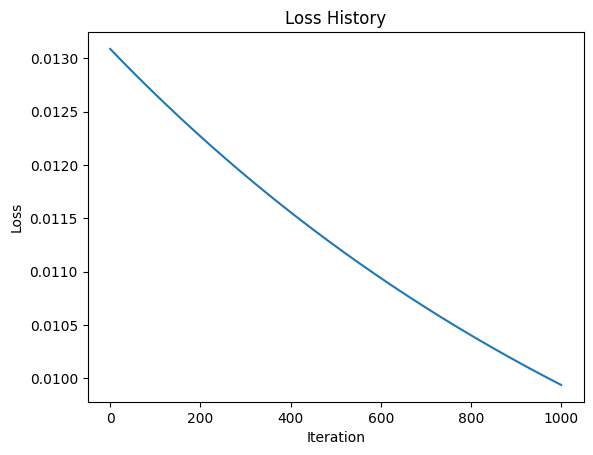

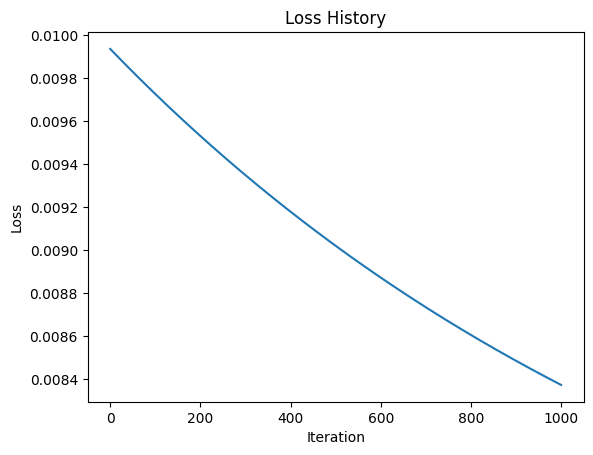

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def h(X, w):
    return np.dot(X, w)

def mse(X, y, w):
    m = len(y)
    predictions = X.dot(w)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

def grad_step(X, y, w, learning_rate=0.1):
    m = len(y)
    predictions = X.dot(w)
    errors = predictions - y
    gradient = (1 / m) * X.T.dot(errors)
    print(f"gradient:{gradient}, w:{w}")
    w = w - learning_rate * gradient
    return w

def grad_descent(weights, ds, num_iter, learning_rate=0.1, epsilon=1e-10):
    w = weights
    features = ds[["x0", "area", "bathrooms", "bedrooms"]].values
    target = ds["price"].values
    loss = mse(features, target, w)
    loss_history = [loss]

    for i in range(num_iter):
        w = grad_step(features, target, w, learning_rate=learning_rate)
        loss = mse(features, target, w)
        print(f'Iteration {i+1}: Loss {loss}, Weights: {w}')

        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w, loss_history

def normalization(data):
    return (data - data.mean()) / (data.max() - data.min())

def plot_loss_history(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()

# Load dataset
df = pd.read_csv("Housing.csv")

# Normalize the dataset
norm = pd.DataFrame()
norm["price"] = normalization(df.price)
norm["x0"] = 1  # Bias term
norm["area"] = normalization(df.area)
norm["bathrooms"] = normalization(df.bathrooms)
norm["bedrooms"] = normalization(df.bedrooms)

# Initial weights
initial_weights = np.zeros(4)

# Gradient descent
w, history = grad_descent(initial_weights, norm, 1000, learning_rate=0.01)

# Further training
w, ext_history = grad_descent(w, norm, 1000, learning_rate=0.01)

# Plot loss history
plot_loss_history(history)
plot_loss_history(ext_history)

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Функція гіпотези лінійної регресії у векторному вигляді
def hypothesis(X, w):
    return np.dot(X, w)

# Функція для обчислення функції втрат у векторному вигляді
def cost_function(X, y, w):
    m = len(y)
    J = np.sum((hypothesis(X, w) - y) ** 2)/(2 * m)
    return J

# Один крок градієнтного спуску
def gradient_descent(X, y, w, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        w = w - alpha * (1/m) * np.dot(X.T, (hypothesis(X, w) - y))
        print(f'Iteration {i+1}: Loss {cost_function(X, y, w)}, Weights: {w}')
    return w

# Завантаження датасету
data = pd.read_csv('Housing.csv')

# Попередня обробка даних
data = pd.get_dummies(data, drop_first=True)
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

# Розділення даних на характеристики та цільову змінну
X = data.drop('price', axis=1)
y = data['price']

# Додавання стовпця одиниць до X для зміщення
X = np.c_[np.ones(X.shape[0]), X]

# Ініціалізація w
w = np.zeros(X.shape[1])

# Встановлення швидкості навчання та кількості ітерацій
alpha = 0.0001
iterations = 1000

# Виконання градієнтного спуску
w = gradient_descent(X, y, w, alpha, iterations)

print("Parameters obtained from gradient descent: ", w)

Iteration 1: Loss 0.4998392181509803, Weights: [ 1.68264994e-20  5.35997346e-05  3.66494026e-05  5.17545339e-05
  4.20712366e-05  3.84393649e-05  2.96898489e-05  2.55517290e-05
  1.87056598e-05  9.30728439e-06  4.52954084e-05  3.29777050e-05
  6.36563382e-06 -2.80587357e-05]
Iteration 2: Loss 0.4996785144064096, Weights: [ 3.34085461e-20  1.07187358e-04  7.32883676e-05  1.03497280e-04
  8.41325809e-05  7.68689966e-05  5.93718826e-05  5.10964753e-05
  3.74064222e-05  1.86134623e-05  9.05804414e-05  6.59475683e-05
  1.27285424e-05 -5.61097778e-05]
Iteration 3: Loss 0.4995178887279839, Weights: [ 5.71612075e-20  1.60762874e-04  1.09916898e-04  1.55228242e-04
  1.26184035e-04  1.15288898e-04  8.90461029e-05  7.66342408e-05
  5.61022884e-05  2.79185339e-05  1.35855101e-04  9.89095919e-05
  1.90887265e-05 -8.41531283e-05]
Iteration 4: Loss 0.49935734107741786, Weights: [ 7.12579842e-20  2.14326285e-04  1.46534996e-04  2.06947423e-04
  1.68225602e-04  1.53699070e-04  1.18712512e-04  1.0216502